pip3 install plotly<BR>
py -m pip install plotly

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# GroupBy

In [6]:
# create a dataframe of car models by two companies
df = pd.DataFrame({
    'Company': ['A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Model': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4'],
    'Year': [2019, 2020, 2021, 2018, 2019, 2020, 2021],
    'Transmission': ['Manual', 'Automatic', 'Automatic', 
            'Manual', 'Automatic', 'Automatic', 'Manual'],
    'EngineSize': [1.4, 2.0, 1.4, 1.5, 2.0, 1.5, 1.5],
    'MPG': [55.4, 67.3, 58.9, 52.3, 64.2, 68.9, 83.1]
})
# display the dataframe
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1


In [7]:
# groupby columns on Col1 and estimate the 
# maximum value of column Col2 for each group
# df.groupby([Col1])[Col2].max()
df.groupby(["Company"])["MPG"].max()

Company
A    67.3
B    83.1
Name: MPG, dtype: float64

In [8]:
# alternatively, you can pass 'max' to the agg() function
df.groupby(["Company"])["MPG"].agg('max')

Company
A    67.3
B    83.1
Name: MPG, dtype: float64

In [9]:
df.groupby(["Company"])["MPG"].agg(['max','min','mean','count','std','median'])

,max,min,mean,count,std,median
Company,,,,,,
A,67.3,55.4,60.533333,3,6.115826,58.90
B,83.1,52.3,67.125000,4,12.736921,66.55


# Add new row

### Use pd.concat([df, new_df], ignore_index=True) to add new row of data. 

In [10]:
df = pd.concat([df, pd.DataFrame({
                                "Company":["C"],
                                "Model":["C1"],
                                "Year":[2023],
                                "Transmission":["Automatic"],
                                "EngineSize":[1.8] ,
                                "MPG":[70],
                                })
                ], ignore_index=True)

In [11]:
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


# Access a row

In [12]:
df.iloc[5]

Company                 B
Model                  B3
Year                 2020
Transmission    Automatic
EngineSize            1.5
MPG                  68.9
Name: 5, dtype: object

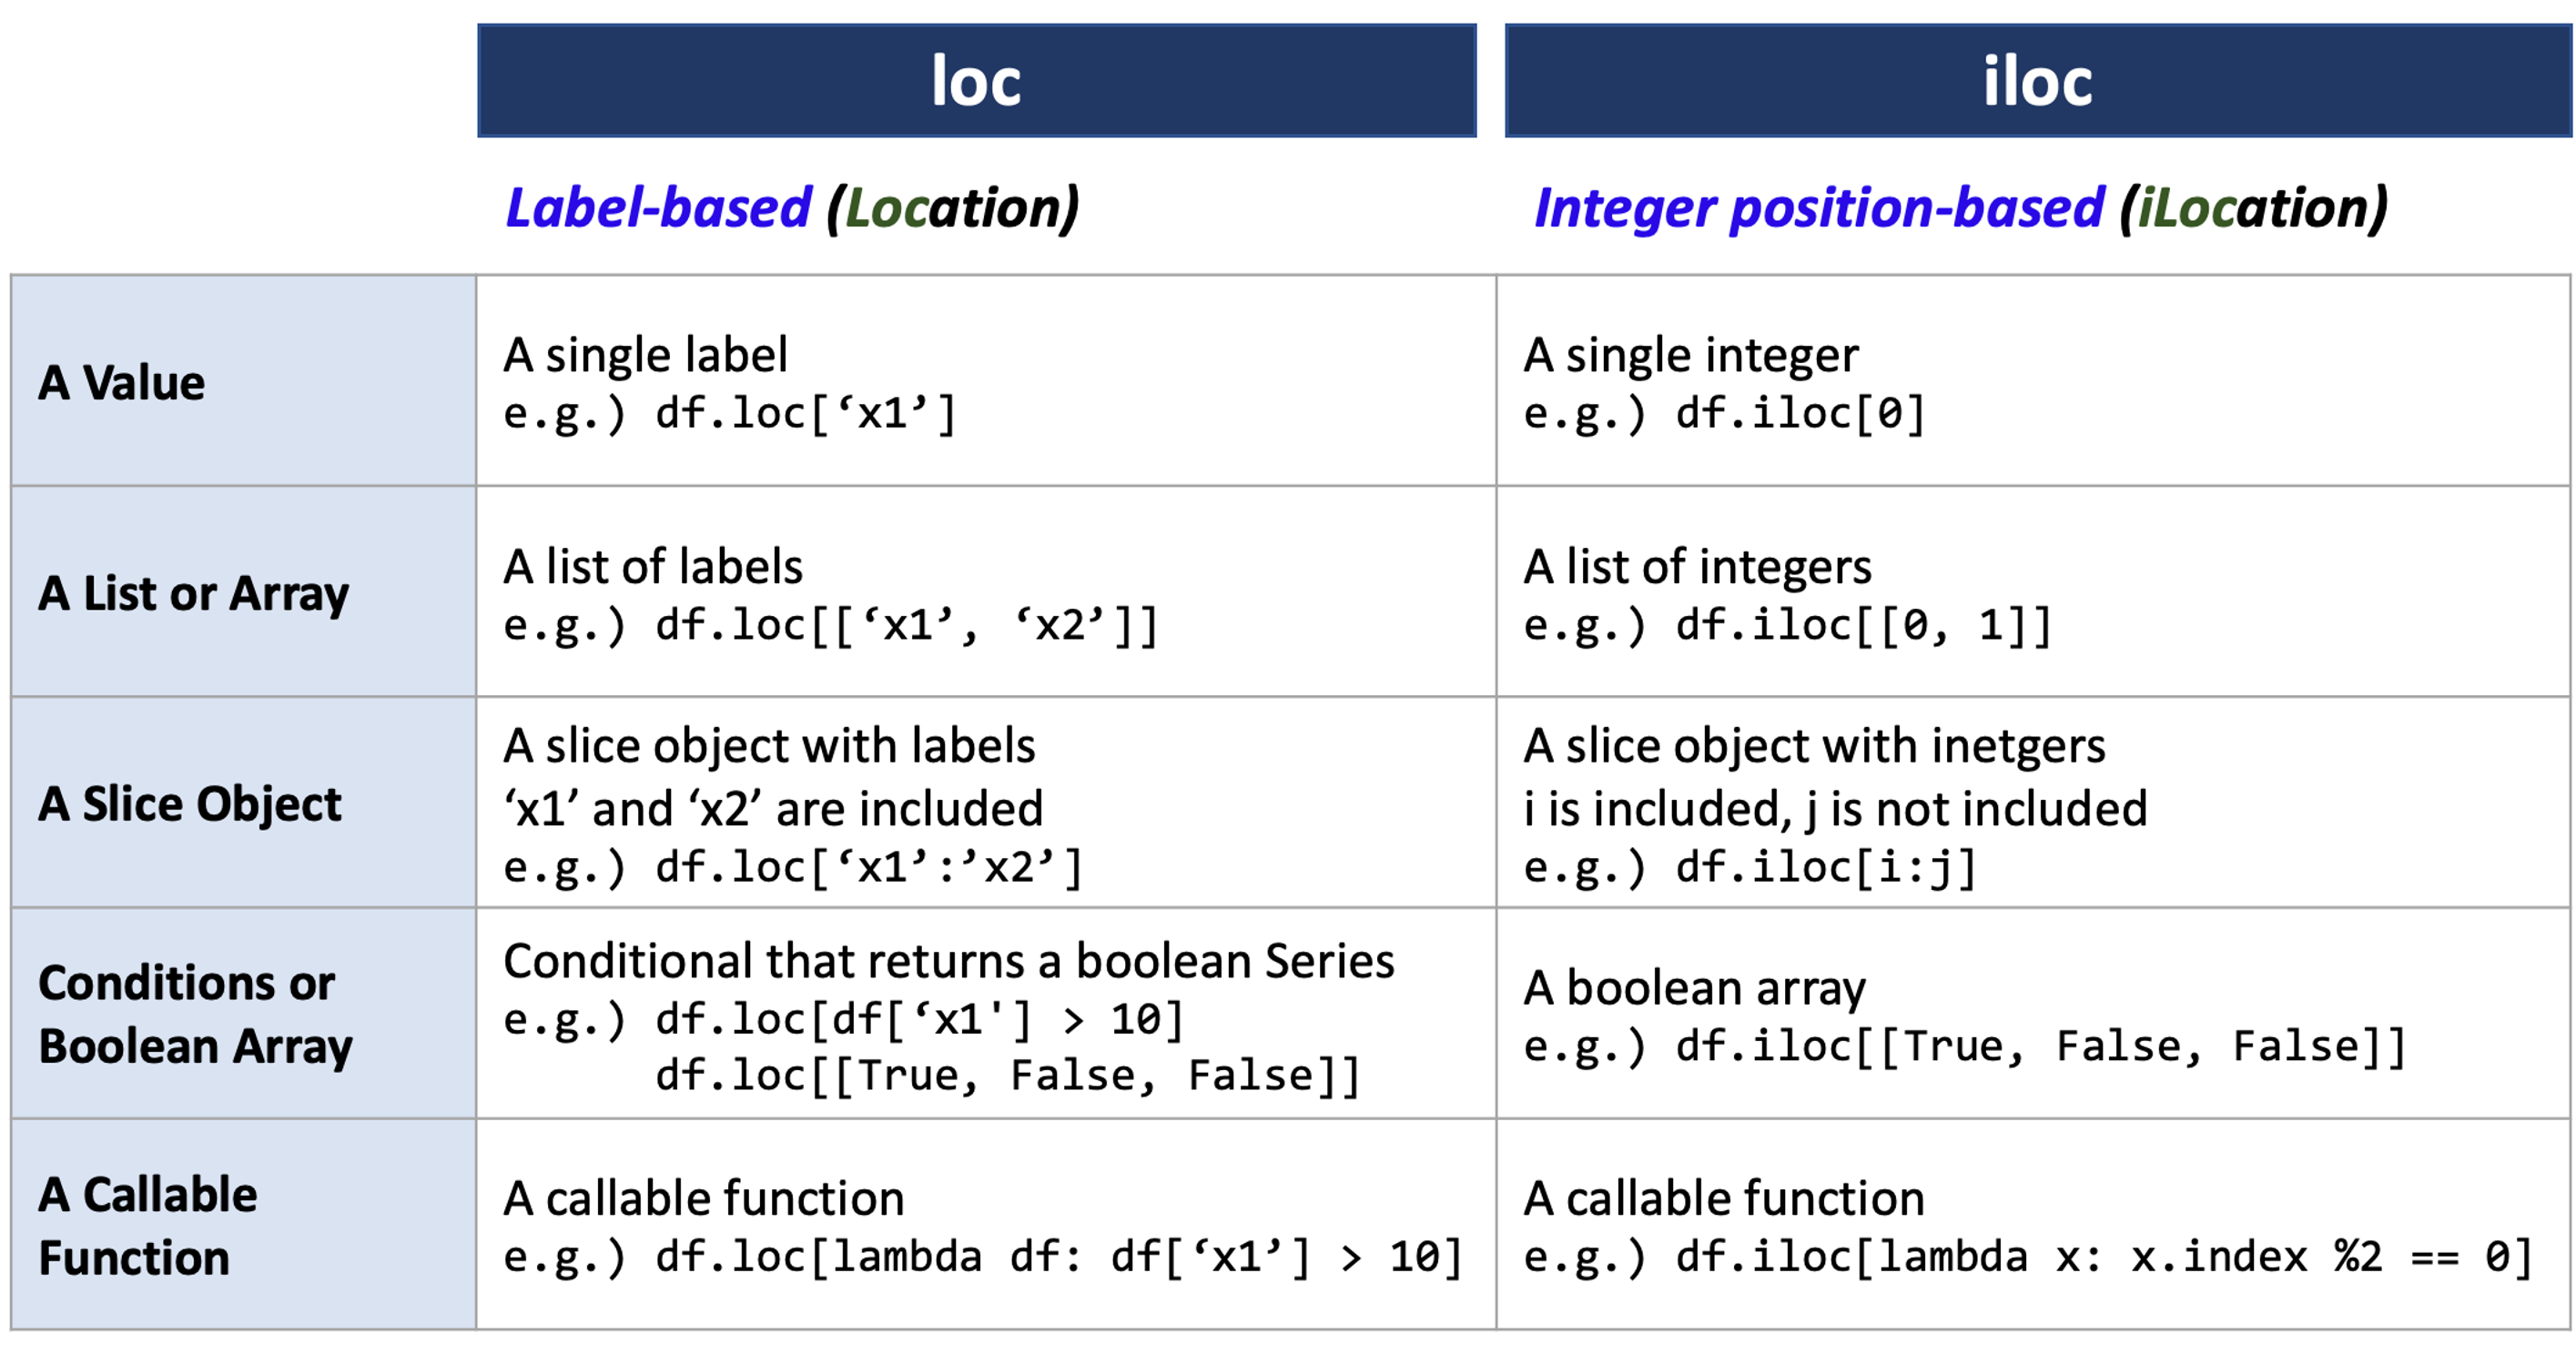

# df.sort_values

In [13]:
df.sort_values(by=["Year",'Company'], ascending=[True, False])

,Company,Model,Year,Transmission,EngineSize,MPG
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
0,A,A1,2019,Manual,1.4,55.4
5,B,B3,2020,Automatic,1.5,68.9
1,A,A2,2020,Automatic,2.0,67.3
6,B,B4,2021,Manual,1.5,83.1
2,A,A3,2021,Automatic,1.4,58.9
7,C,C1,2023,Automatic,1.8,70.0


In [14]:
df1 = df.sort_values(by="Year", ascending=True)
df1

,Company,Model,Year,Transmission,EngineSize,MPG
3,B,B1,2018,Manual,1.5,52.3
0,A,A1,2019,Manual,1.4,55.4
4,B,B2,2019,Automatic,2.0,64.2
1,A,A2,2020,Automatic,2.0,67.3
5,B,B3,2020,Automatic,1.5,68.9
2,A,A3,2021,Automatic,1.4,58.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


In [15]:
df1 = df.sort_values(by=["Company","Year"], ascending=[True,False])
df1

,Company,Model,Year,Transmission,EngineSize,MPG
2,A,A3,2021,Automatic,1.4,58.9
1,A,A2,2020,Automatic,2.0,67.3
0,A,A1,2019,Manual,1.4,55.4
6,B,B4,2021,Manual,1.5,83.1
5,B,B3,2020,Automatic,1.5,68.9
4,B,B2,2019,Automatic,2.0,64.2
3,B,B1,2018,Manual,1.5,52.3
7,C,C1,2023,Automatic,1.8,70.0


# df.set_index

In [16]:
df.set_index('Model')

,Company,Year,Transmission,EngineSize,MPG
Model,,,,,
A1,A,2019,Manual,1.4,55.4
A2,A,2020,Automatic,2.0,67.3
A3,A,2021,Automatic,1.4,58.9
B1,B,2018,Manual,1.5,52.3
B2,B,2019,Automatic,2.0,64.2
B3,B,2020,Automatic,1.5,68.9
B4,B,2021,Manual,1.5,83.1
C1,C,2023,Automatic,1.8,70.0


# df.reset_index

In [17]:
df1.reset_index(drop=True)

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A3,2021,Automatic,1.4,58.9
1,A,A2,2020,Automatic,2.0,67.3
2,A,A1,2019,Manual,1.4,55.4
3,B,B4,2021,Manual,1.5,83.1
4,B,B3,2020,Automatic,1.5,68.9
5,B,B2,2019,Automatic,2.0,64.2
6,B,B1,2018,Manual,1.5,52.3
7,C,C1,2023,Automatic,1.8,70.0


In [18]:
df1.reset_index(drop=False)

,index,Company,Model,Year,Transmission,EngineSize,MPG
0,2,A,A3,2021,Automatic,1.4,58.9
1,1,A,A2,2020,Automatic,2.0,67.3
2,0,A,A1,2019,Manual,1.4,55.4
3,6,B,B4,2021,Manual,1.5,83.1
4,5,B,B3,2020,Automatic,1.5,68.9
5,4,B,B2,2019,Automatic,2.0,64.2
6,3,B,B1,2018,Manual,1.5,52.3
7,7,C,C1,2023,Automatic,1.8,70.0


# Alter column/series order

In [19]:
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


In [20]:
df.columns

Index(['Company', 'Model', 'Year', 'Transmission', 'EngineSize', 'MPG'], dtype='object')

In [21]:
df.values

array([['A', 'A1', 2019, 'Manual', 1.4, 55.4],
       ['A', 'A2', 2020, 'Automatic', 2.0, 67.3],
       ['A', 'A3', 2021, 'Automatic', 1.4, 58.9],
       ['B', 'B1', 2018, 'Manual', 1.5, 52.3],
       ['B', 'B2', 2019, 'Automatic', 2.0, 64.2],
       ['B', 'B3', 2020, 'Automatic', 1.5, 68.9],
       ['B', 'B4', 2021, 'Manual', 1.5, 83.1],
       ['C', 'C1', 2023, 'Automatic', 1.8, 70.0]], dtype=object)

In [22]:
df[["MPG","EngineSize","Transmission","Company","Model","Year"]]

,MPG,EngineSize,Transmission,Company,Model,Year
0,55.4,1.4,Manual,A,A1,2019
1,67.3,2.0,Automatic,A,A2,2020
2,58.9,1.4,Automatic,A,A3,2021
3,52.3,1.5,Manual,B,B1,2018
4,64.2,2.0,Automatic,B,B2,2019
5,68.9,1.5,Automatic,B,B3,2020
6,83.1,1.5,Manual,B,B4,2021
7,70.0,1.8,Automatic,C,C1,2023


In [23]:
df.iloc[:, [5,4,3,0,1,2]] #< ---- : 係 全部rows

,MPG,EngineSize,Transmission,Company,Model,Year
0,55.4,1.4,Manual,A,A1,2019
1,67.3,2.0,Automatic,A,A2,2020
2,58.9,1.4,Automatic,A,A3,2021
3,52.3,1.5,Manual,B,B1,2018
4,64.2,2.0,Automatic,B,B2,2019
5,68.9,1.5,Automatic,B,B3,2020
6,83.1,1.5,Manual,B,B4,2021
7,70.0,1.8,Automatic,C,C1,2023


# Series.unique

In [71]:
df["EngineSize"].unique()

array([1.4, 2. , 1.5, 1.8])

In [25]:
df["EngineSize"].unique().tolist()

[1.4, 2.0, 1.5, 1.8]

In [26]:
df["Company"].unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
df["Year"].unique()

array([2019, 2020, 2021, 2018, 2023])

# Series.nunique

In [28]:
df["EngineSize"].nunique()

4

In [29]:
df["Year"].nunique()

5

In [30]:
df["Transmission"].nunique()

2

# Return a series containing counts of unique values

In [31]:
df['Year'].value_counts()       # .items())

Year
2019    2
2020    2
2021    2
2018    1
2023    1
Name: count, dtype: int64

# pd.read_json

In [72]:
import plotly.express as px
link = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.rvd.gov.hk%2Fdoc%2Fen%2Fstatistics%2Fhis_data_16.xls%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%7D"
data = pd.read_json(link)

In [73]:
# change the column name
data = data.rename(columns = {'年 Year':'Year',
                              '月 Month':'Month',
                              '一手買賣 數目 Primary Sales No.':'FirstHandSales',
                              '一手買賣 總值 (百萬元) Primary Sales Consideration ($ million)':
                              'FirstConsideration',
                              '二手買賣 數目 Secondary Sales No.':'SecondHandSales',
                              '二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million)':
                              'SecondConsideration'
    })

In [34]:
data.describe()

,Year,Month,FirstHandSales,FirstConsideration,SecondHandSales,SecondConsideration
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2013.378947,6.452632,1378.568421,11873.350877,4909.014035,22966.266667
std,6.868758,3.444024,756.135216,7482.667621,2521.318393,10504.208944
min,2002.000000,1.000000,131.000000,545.000000,1573.000000,4174.000000
25%,2007.000000,3.000000,808.000000,6042.000000,3086.000000,15140.000000
50%,2013.000000,6.000000,1257.000000,9985.000000,4271.000000,21444.000000
75%,2019.000000,9.000000,1810.000000,16207.000000,6153.000000,29736.000000
max,2025.000000,12.000000,3958.000000,42350.000000,13206.000000,55275.000000


In [35]:
# join Year and Month as new column
data["DateTime"] = data["Year"].astype(str) + "-" + data["Month"].astype(str)
# drop Year and Month
data = data.drop(['Year','Month'], axis=1)
# set DateTime as index
data = data.set_index('DateTime')
data

,FirstHandSales,FirstConsideration,SecondHandSales,SecondConsideration
DateTime,,,,
2002-1,2718,8218,5129,9966
2002-2,1506,4305,4189,8070
2002-3,1709,4190,3741,6795
2002-4,2543,6516,4866,8739
2002-5,2257,5844,5068,11097
...,...,...,...,...
2025-5,1676,14759,3429,23485
2025-6,2147,34544,3808,26517
2025-7,1865,19835,3901,26519


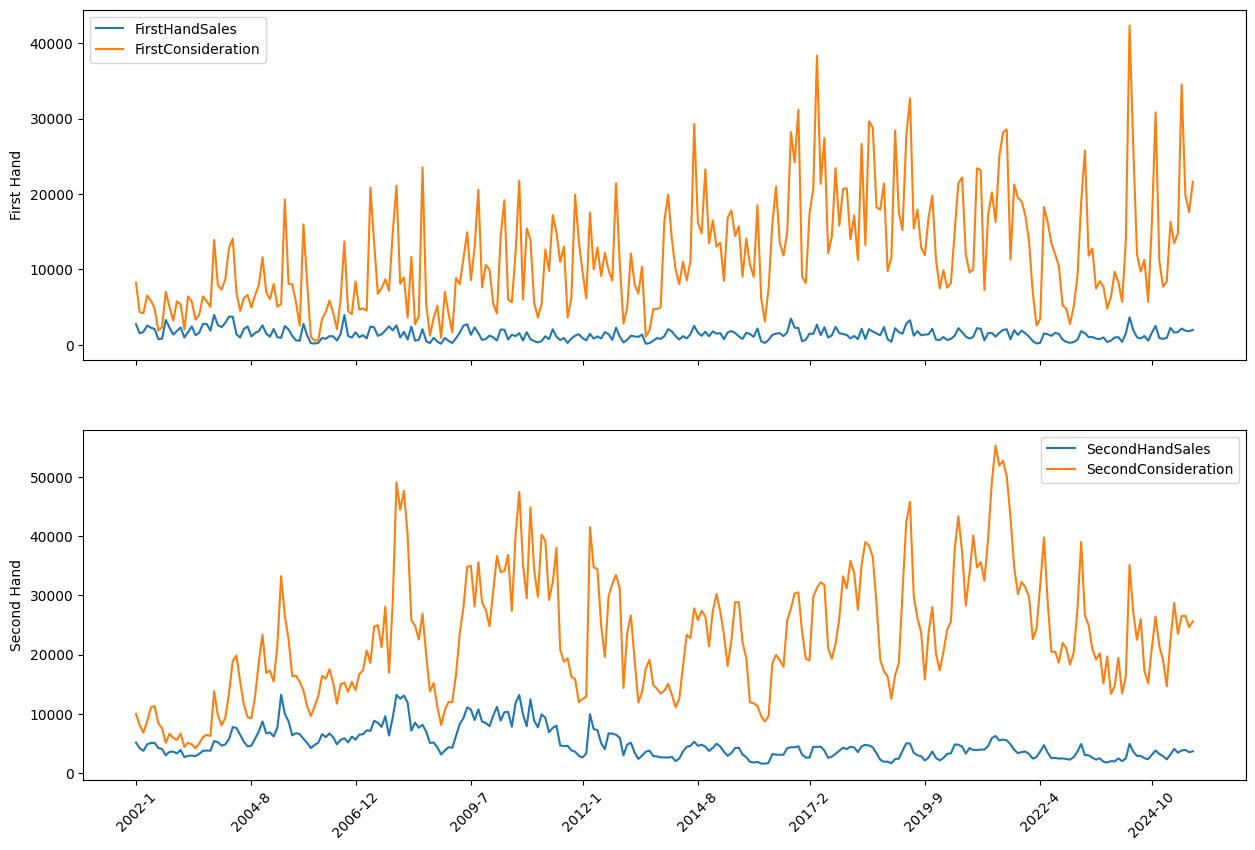

In [36]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator ######

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(15, 10),
                             gridspec_kw={'height_ratios':[1,1]})

ax1.plot( data.index, data['FirstHandSales'], data['FirstConsideration'])
ax1.set_ylabel('First Hand')
ax1.legend(['FirstHandSales', 'FirstConsideration'])

ax2.plot( data.index, data['SecondHandSales'], data['SecondConsideration'] )
ax2.set_ylabel('Second Hand')
ax2.legend(['SecondHandSales','SecondConsideration'])

ax2.xaxis.set_major_locator(AutoDateLocator(maxticks=15))
ax2.xaxis.set_tick_params(rotation=45 )

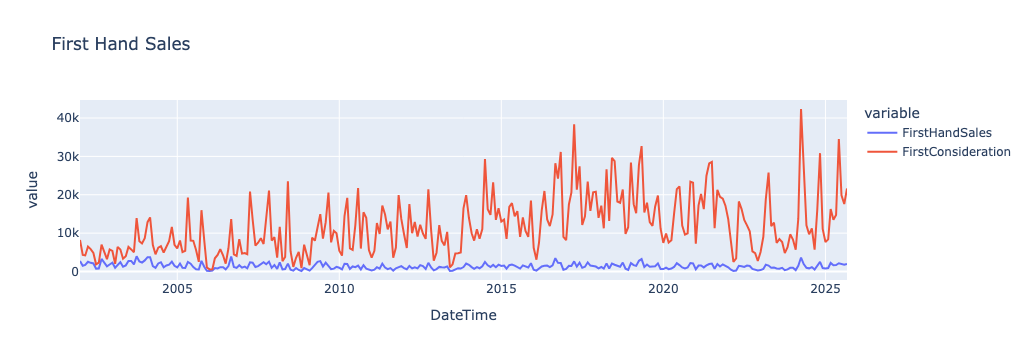

In [37]:
fig = px.line(data, x=data.index, y=["FirstHandSales","FirstConsideration"], title='First Hand Sales')
fig.show()

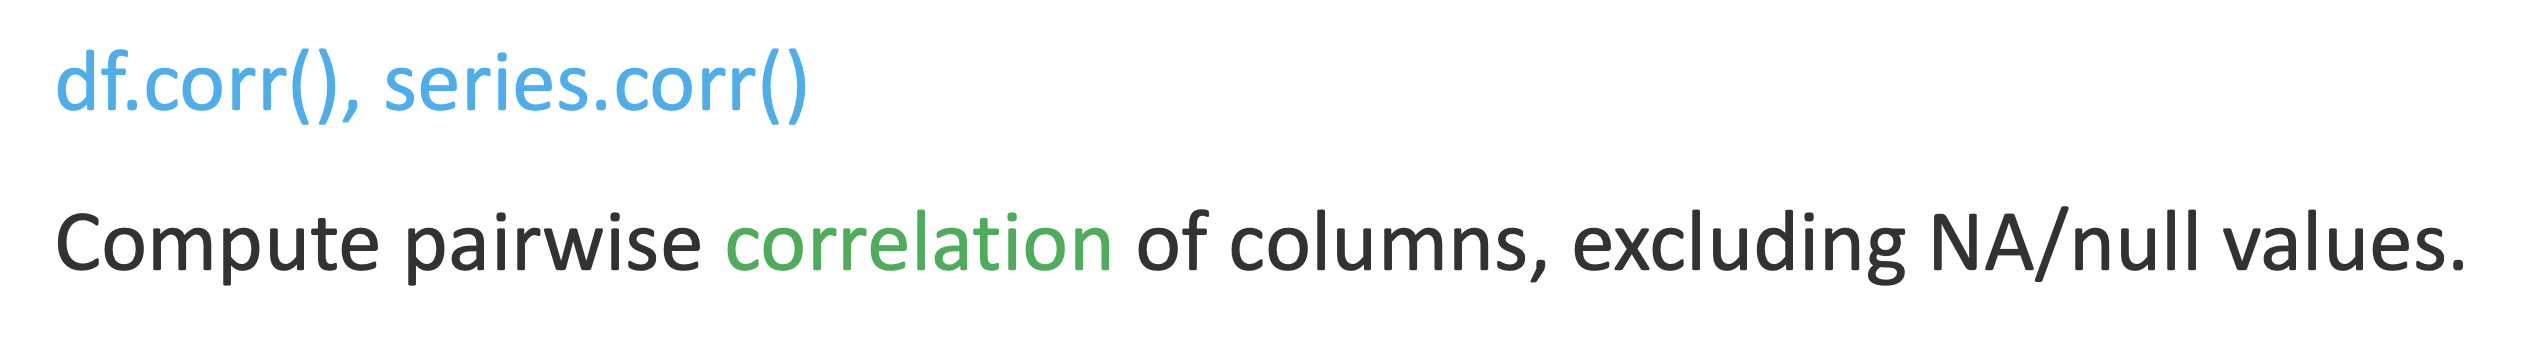

In [38]:
data.corr()['FirstHandSales']

FirstHandSales         1.000000
FirstConsideration     0.572771
SecondHandSales        0.124650
SecondConsideration    0.067982
Name: FirstHandSales, dtype: float64

In [39]:
data["FirstHandSales"].corr(data["FirstConsideration"])

0.572770923148406

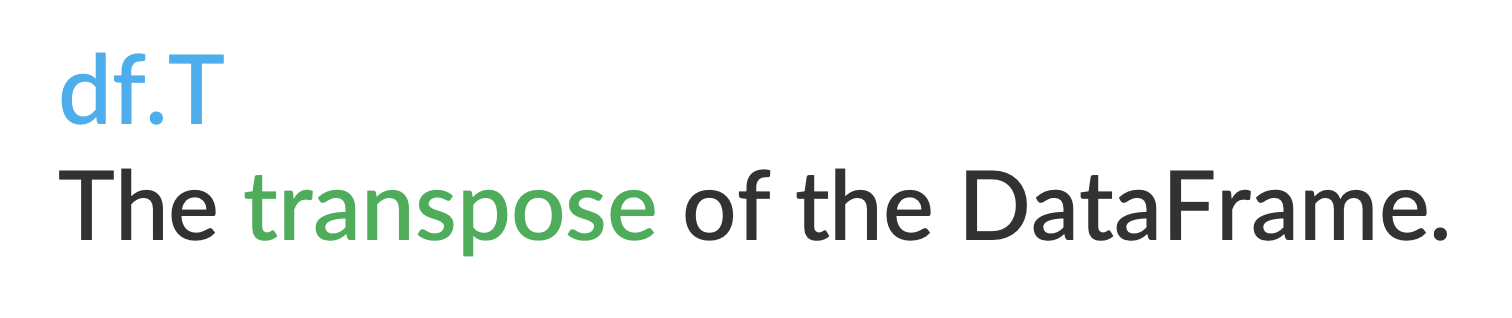

In [40]:
data

,FirstHandSales,FirstConsideration,SecondHandSales,SecondConsideration
DateTime,,,,
2002-1,2718,8218,5129,9966
2002-2,1506,4305,4189,8070
2002-3,1709,4190,3741,6795
2002-4,2543,6516,4866,8739
2002-5,2257,5844,5068,11097
...,...,...,...,...
2025-5,1676,14759,3429,23485
2025-6,2147,34544,3808,26517
2025-7,1865,19835,3901,26519


In [41]:
data.T

DateTime,2002-1,2002-2,2002-3,2002-4,2002-5,2002-6,2002-7,2002-8,2002-9,2002-10,...,2024-12,2025-1,2025-2,2025-3,2025-4,2025-5,2025-6,2025-7,2025-8,2025-9
FirstHandSales,2718,1506,1709,2543,2257,2087,755,796,3278,2282,...,887,768,900,2229,1614,1676,2147,1865,1781,1974
FirstConsideration,8218,4305,4190,6516,5844,4840,1866,2313,7005,5032,...,11119,7692,8368,16272,13475,14759,34544,19835,17575,21621
SecondHandSales,5129,4189,3741,4866,5068,5108,4206,4085,3000,3581,...,3216,2858,2300,3138,4080,3429,3808,3901,3510,3669
SecondConsideration,9966,8070,6795,8739,11097,11289,8406,7554,5108,6626,...,21444,19052,14646,22543,28722,23485,26517,26519,24633,25606


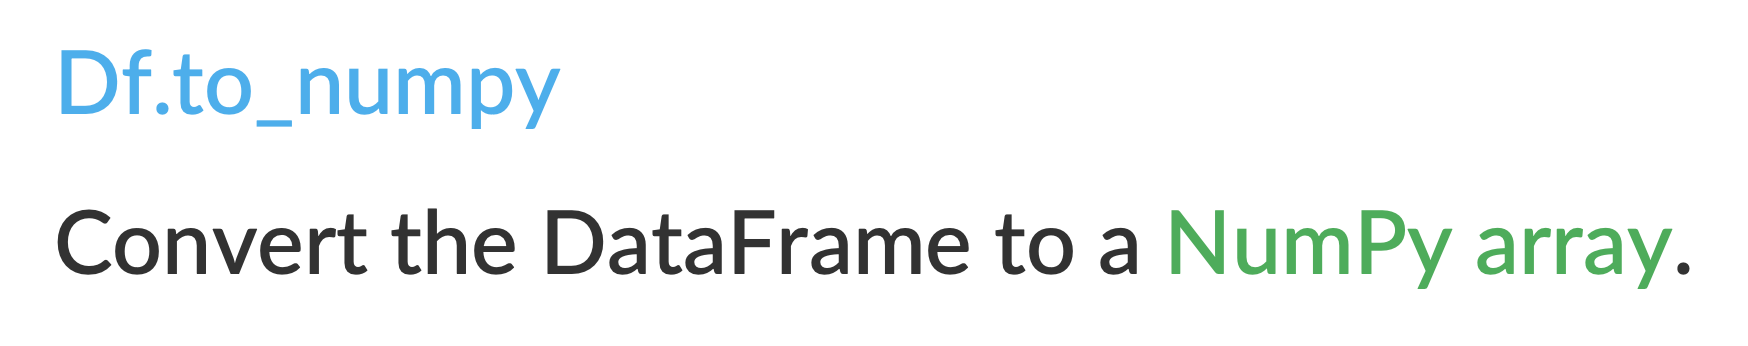

In [42]:
data.to_numpy()

array([[ 2718,  8218,  5129,  9966],
       [ 1506,  4305,  4189,  8070],
       [ 1709,  4190,  3741,  6795],
       ...,
       [ 1865, 19835,  3901, 26519],
       [ 1781, 17575,  3510, 24633],
       [ 1974, 21621,  3669, 25606]])

In [43]:
data["FirstConsideration"].to_numpy()

array([ 8218,  4305,  4190,  6516,  5844,  4840,  1866,  2313,  7005,
        5032,  3202,  5757,  5342,  2001,  6418,  5710,  3314,  3975,
        6415,  5755,  5012, 13907,  7897,  7302,  8698, 12848, 14089,
        6884,  4476,  6199,  6587,  4941,  6544,  7923, 11607,  6967,
        6021,  8060,  5049,  5404, 19273,  8073,  7995,  5619,  2515,
       15974,  8178,  1047,   545,   604,  3440,  4334,  5848,  4238,
        2063,  6054, 13686,  4455,  4061,  8397,  4659,  4820,  4501,
       20854, 13487,  6745,  7493,  8677,  7163, 14913, 21092,  8066,
        8927,  3614, 11644,  2702,  3788, 23532,  5300,  1208,  3575,
        5135,   907,  6999,  4134,  1653,  8845,  8034, 11478, 14925,
        8574, 12865, 20575,  7593, 10592,  9954,  5433,  4143, 14432,
       19177,  6042,  5627, 12103, 21768,  5980, 15427, 13974,  5597,
        3597,  5391, 12647,  9778, 17200, 14850, 10980, 13007,  3586,
        6237, 19900, 13712,  9707,  6132, 17546,  9985, 12894,  9129,
       12177,  9889,

# Time Series

In [44]:
tnx = pd.read_csv("^TNX.csv")
tnx.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
7057,2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7058,2022-12-27,3.787,3.862,3.787,3.860,3.860,0.0
7059,2022-12-28,3.818,3.890,3.815,3.887,3.887,0.0
7060,2022-12-29,3.868,3.886,3.818,3.835,3.835,0.0
7061,2022-12-30,3.869,3.905,3.831,3.879,3.879,0.0


In [45]:
tnx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062 entries, 0 to 7061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7062 non-null   object 
 1   Open       5780 non-null   float64
 2   High       5780 non-null   float64
 3   Low        5780 non-null   float64
 4   Close      5780 non-null   float64
 5   Adj Close  5780 non-null   float64
 6   Volume     5780 non-null   float64
dtypes: float64(6), object(1)
memory usage: 386.3+ KB


# DATE // change date as index

In [46]:
tnx['Date'] = pd.to_datetime(tnx['Date'],format="%Y-%m-%d")
tnx.Date

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
7057   2022-12-26
7058   2022-12-27
7059   2022-12-28
7060   2022-12-29
7061   2022-12-30
Name: Date, Length: 7062, dtype: datetime64[ns]

In [47]:
tnx = tnx.set_index('Date') 
tnx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7062 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5780 non-null   float64
 1   High       5780 non-null   float64
 2   Low        5780 non-null   float64
 3   Close      5780 non-null   float64
 4   Adj Close  5780 non-null   float64
 5   Volume     5780 non-null   float64
dtypes: float64(6)
memory usage: 386.2 KB


In [48]:
tnx.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,3.818,3.890,3.815,3.887,3.887,0.0
2022-12-29,3.868,3.886,3.818,3.835,3.835,0.0
2022-12-30,3.869,3.905,3.831,3.879,3.879,0.0


In [49]:
df_dt = pd.DataFrame({'year': [2023, 2023],
                   'month': [1, 1],
                   'day': [1, 2],
                   'sales': [3750, 3900]})
df_dt

,year,month,day,sales
0,2023,1,1,3750
1,2023,1,2,3900


In [50]:
pd.to_datetime(df_dt[['year','month','day']])

0   2023-01-01
1   2023-01-02
dtype: datetime64[ns]

In [51]:
df_dt[['year','month','day']].to_numpy()

array([[2023,    1,    1],
       [2023,    1,    2]])

In [52]:
df_dt['date'] = pd.to_datetime(df_dt[['year','month','day']])
df_dt = df_dt.drop(['year','month','day'], axis=1)
df_dt = df_dt.set_index('date')
df_dt

,sales
date,
2023-01-01,3750
2023-01-02,3900


In [53]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2023-01-01 to 2023-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


In [54]:
pd.to_datetime(1681038343, unit='s')

Timestamp('2023-04-09 11:05:43')

In [55]:
pd.to_datetime(1681038343433502912, unit='ns')

Timestamp('2023-04-09 11:05:43.433502912')

# Categorical data .. must change to category first

In [56]:
animal = pd.Series(["Bird","Cat", "Dog","Elephant"], dtype="category")

In [57]:
animal.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype   
--------------  -----   
4 non-null      category
dtypes: category(1)
memory usage: 340.0 bytes


In [58]:
df_exam = pd.DataFrame({'Score': np.random.randint(1, 101, size=40)})

In [59]:
df_exam.head(6)

,Score
0,45
1,42
2,9
3,19
4,82
5,14


In [60]:
np.where(df_exam['Score']>70, 'Distinction',
             np.where(df_exam['Score']>60, 'Good',
                   np.where(df_exam['Score']>=50, 'Pass', 'Fail') 
                    ))

array(['Fail', 'Fail', 'Fail', 'Fail', 'Distinction', 'Fail',
       'Distinction', 'Good', 'Distinction', 'Distinction', 'Good',
       'Fail', 'Distinction', 'Fail', 'Distinction', 'Fail', 'Good',
       'Distinction', 'Distinction', 'Distinction', 'Pass', 'Pass',
       'Fail', 'Fail', 'Distinction', 'Pass', 'Distinction',
       'Distinction', 'Fail', 'Distinction', 'Good', 'Fail', 'Fail',
       'Pass', 'Distinction', 'Pass', 'Fail', 'Fail', 'Fail',
       'Distinction'], dtype='<U11')

In [61]:
df_exam['Result'] = pd.Series(np.where(df_exam['Score']>70, 'Distinction',
                                 np.where(df_exam['Score']>60, 'Good', # elif
                                       np.where(df_exam['Score']>=50, 'Pass', 'Fail') 
                    ))).astype('category') 

In [62]:
df_exam.Result.value_counts()

Result
Fail           16
Distinction    15
Pass            5
Good            4
Name: count, dtype: int64

In [63]:
df_exam.sample(10)

,Score,Result
34,97,Distinction
30,66,Good
16,64,Good
33,52,Pass
8,86,Distinction
25,57,Pass
3,19,Fail
5,14,Fail
26,82,Distinction
18,92,Distinction


In [64]:
df_exam

,Score,Result
0,45,Fail
1,42,Fail
2,9,Fail
3,19,Fail
4,82,Distinction
5,14,Fail
6,71,Distinction
7,65,Good
8,86,Distinction
9,72,Distinction


In [65]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Score   40 non-null     int64   
 1   Result  40 non-null     category
dtypes: category(1), int64(1)
memory usage: 696.0 bytes


In [75]:
import yfinance as yf
hsi = yf.download('^HSI', start='2023-10-10', end='2025-8-16').droplevel('Ticker',axis=1)
hsi.head(3)

/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_73663/4289417737.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-10-10,17664.730469,17916.619141,17638.009766,17726.630859,1596800000
2023-10-11,17893.099609,18022.449219,17889.710938,17956.830078,2029100000
2023-10-12,18238.210938,18290.910156,18175.349609,18258.259766,3861600000


In [80]:
hsi ['Return'] = hsi['Close'].pct_change(1)
# daily return

hsi ['upOrDown'] = np.where(hsi['Return']>0, 'Up', 'Down')
hsi.head(5)

Price,Close,High,Low,Open,Volume,Return,upOrDown
Date,,,,,,,
2023-10-10,17664.730469,17916.619141,17638.009766,17726.630859,1596800000,NaN,Down
2023-10-11,17893.099609,18022.449219,17889.710938,17956.830078,2029100000,0.012928,Up
2023-10-12,18238.210938,18290.910156,18175.349609,18258.259766,3861600000,0.019287,Up
2023-10-13,17813.449219,18013.669922,17776.949219,17946.769531,2139700000,-0.023290,Down
2023-10-16,17640.359375,17858.179688,17601.500000,17803.310547,1904600000,-0.009717,Down


In [83]:
hsi ['upOrDown2'] = np.where(hsi['Close']> hsi['Close'].shift(1), 'Up', 'Down')
hsi.head(5)

Price,Close,High,Low,Open,Volume,Return,upOrDown,upOrDown2
Date,,,,,,,,
2023-10-10,17664.730469,17916.619141,17638.009766,17726.630859,1596800000,NaN,Down,Down
2023-10-11,17893.099609,18022.449219,17889.710938,17956.830078,2029100000,0.012928,Up,Up
2023-10-12,18238.210938,18290.910156,18175.349609,18258.259766,3861600000,0.019287,Up,Up
2023-10-13,17813.449219,18013.669922,17776.949219,17946.769531,2139700000,-0.023290,Down,Down
2023-10-16,17640.359375,17858.179688,17601.500000,17803.310547,1904600000,-0.009717,Down,Down


In [84]:
(hsi['upOrDown'] == hsi['upOrDown2']).all()

True

In [67]:
hsi['MA20'] = hsi['Close'].rolling(20).mean()
hsi['EWM20'] = hsi['Close'].ewm(span=20).mean()
hsi['Zscore20'] = (hsi['Close']-hsi['MA20'])/hsi['Close'].rolling(20).std()
hsi['BB_up'] = hsi['Close']+2*hsi['Close'].rolling(20).std()
hsi['BB_lo'] = hsi['Close']-2*hsi['Close'].rolling(20).std()
hsi['SD20'] = hsi['Close'].rolling(20).std()

Text(0.5, 0.98, 'HSI Close Price as of 2023-10-10 to 2024-10-09')

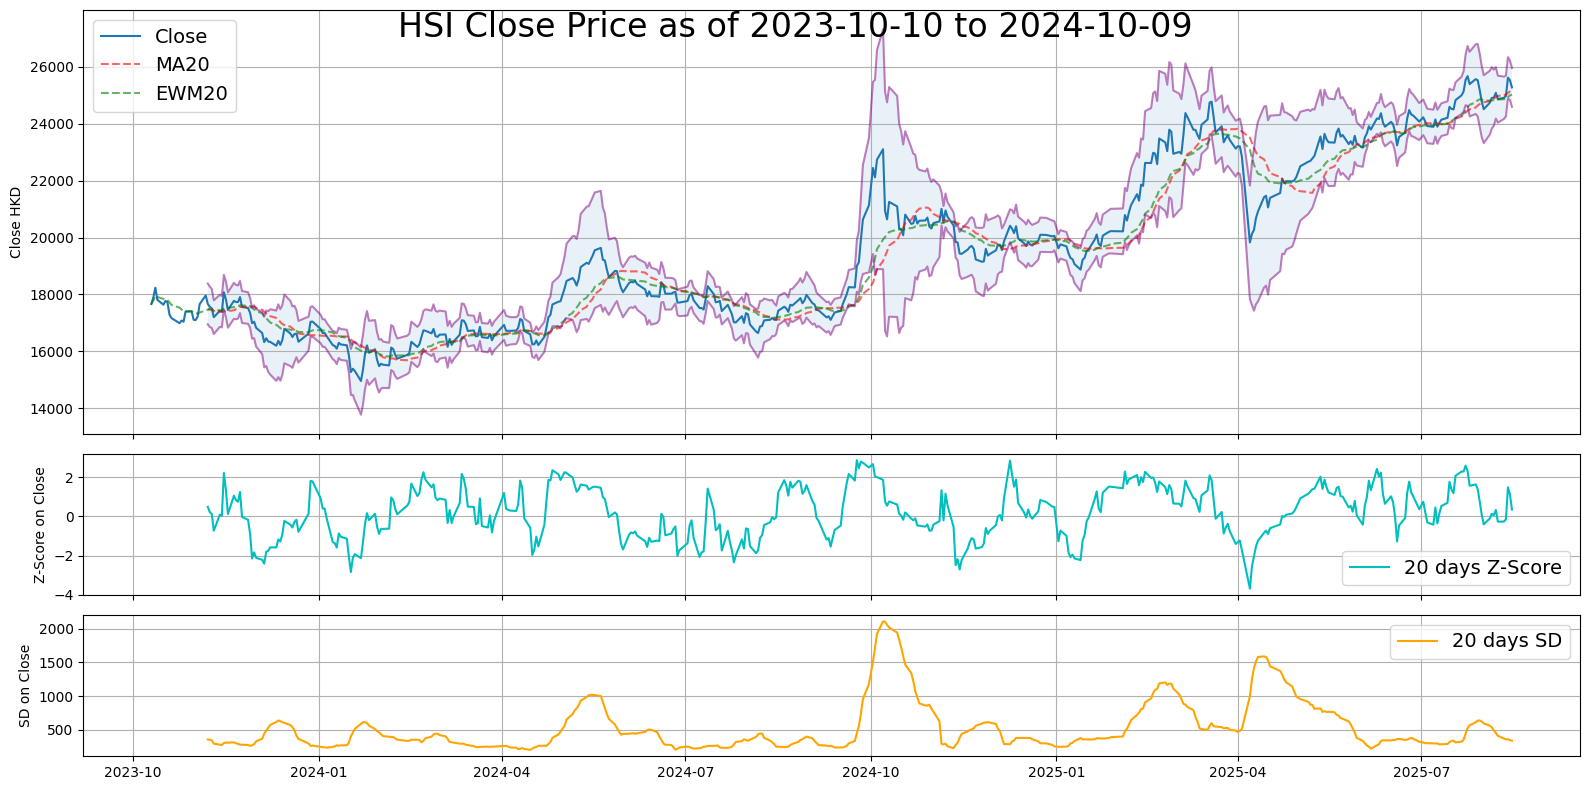

In [68]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8),
                             gridspec_kw={'height_ratios':[3,1,1]})

ax1.plot( hsi.index, hsi['Close'], )
ax1.plot( hsi.index, hsi['MA20'], 'r--', alpha=0.6 )
ax1.plot( hsi.index, hsi['EWM20'], 'g--', alpha=0.6 )
ax1.plot( hsi.index, hsi['BB_up'], 'purple', alpha=0.5 )
ax1.plot( hsi.index, hsi['BB_lo'], 'purple', alpha=0.5 )
ax1.fill_between(hsi.index, hsi['BB_up'],hsi['BB_lo'], alpha=0.1)
ax1.set_ylabel('Close HKD')
ax1.legend(['Close', 'MA20','EWM20'], fontsize=14)
ax1.grid(True)

ax2.plot( hsi.index, hsi['Zscore20'], 'c')
ax2.set_ylabel('Z-Score on Close')
ax2.legend(['20 days Z-Score'],fontsize=14)
ax2.grid(True)

ax3.plot( hsi.index, hsi['SD20'], 'orange')
ax3.set_ylabel('SD on Close')
ax3.legend(['20 days SD'],fontsize=14)
ax3.grid(True)

fig.tight_layout()
fig.suptitle('HSI Close Price as of 2023-10-10 to 2024-10-09', fontsize=24)

In [69]:
hsi['Close'].autocorr(lag=1)

0.9934248979188599

In [70]:
hsi['Close'].autocorr(lag=2)

0.9865497822086731